In [26]:
import librosa
import os
import pandas
from matplotlib import pyplot as plt
%matplotlib inline

In [12]:
wav, samplerate = librosa.load("audible_2048.wav")

In [15]:
wav.shape[0] / samplerate

24.531519274376418

In [21]:
wavs = []

for root, dirs, files in os.walk("."):
    for name in files:
        if name.endswith("wav"):
            profile, datasize = name.split(".")[0].split("_")
            filesize = os.path.getsize(name)
            wav, samplerate = librosa.load(name)
            
            info = (profile, datasize, filesize, samplerate, wav.shape[0])
            print(" ".join([str(i) for i in info]))
            wavs.append(info)

audible-7k-channel-1 2048 431696 22050 53952
audible-7k-channel-0 2048 431696 22050 53952
ultrasonic 16384 43396496 22050 5424552
audible 2048 4327440 22050 540920
audible-7k-channel-1 256 62096 22050 7752
audible-7k-channel-0 65536 13542992 22050 1692864
ultrasonic-3600 4096 1573792 22050 196714
audible 1024 2163920 22050 270480
cable-64k 4096 98064 22050 12248
audible-7k-channel-0 1024 215312 22050 26904
audible-7k-channel-1 1024 215312 22050 26904
ultrasonic-whisper 4096 31704080 22050 3963000
ultrasonic 4096 10864080 22050 1358000
ultrasonic 32768 86792912 22050 10849104
cable-64k 16384 382608 22050 47816
audible-7k-channel-1 32768 6771536 22050 846432
ultrasonic-whisper 128 991760 22050 123960
ultrasonic-whisper 512 3963920 22050 495480
ultrasonic 256 692240 22050 86520
audible-7k-channel-0 256 62096 22050 7752
audible-7k-channel-1 16384 3385808 22050 423216
audible 256 556880 22050 69600
cable-64k 32768 765136 22050 95632
ultrasonic-3600 512 197872 22050 24724
audible-7k-channel-

In [57]:
df = pandas.DataFrame(wavs, columns=["profile", "datasize", "filesize", "samplerate", "samples"])
df["datasize"] = pandas.to_numeric(df["datasize"])
df["filesize"] = pandas.to_numeric(df["filesize"])
df["samplerate"] = pandas.to_numeric(df["samplerate"])
df["samples"] = pandas.to_numeric(df["samples"])
df.sort_values(by=["profile", "datasize"])

df["duration"] = df["samples"] / df["samplerate"]
df.set_index(["datasize"], inplace=True)

profile
audible                 AxesSubplot(0.125,0.125;0.775x0.755)
audible-7k-channel-0    AxesSubplot(0.125,0.125;0.775x0.755)
audible-7k-channel-1    AxesSubplot(0.125,0.125;0.775x0.755)
cable-64k               AxesSubplot(0.125,0.125;0.775x0.755)
ultrasonic              AxesSubplot(0.125,0.125;0.775x0.755)
ultrasonic-3600         AxesSubplot(0.125,0.125;0.775x0.755)
ultrasonic-whisper      AxesSubplot(0.125,0.125;0.775x0.755)
Name: duration, dtype: object

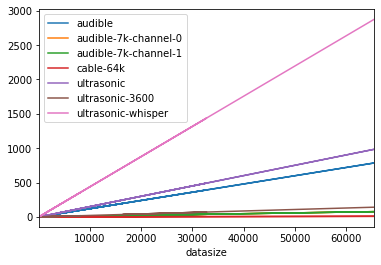

In [60]:

df.groupby('profile')['duration'].plot(legend=True)
#df.groupby('ticker')['adj_close'].plot(legend=True)

#df.plot(x="datasize", y="duration")